In [1]:
#Import the basic libraries to get started with EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read the data
df = pd.read_excel(r"C:\Users\lavan\OneDrive\Desktop\Great learning\Data Mining\Graded Project Data\PCA India Data_Census.xlsx")

Part 2 - PCA: Read the data and perform basic checks like checking head, info, summary, nulls, and duplicates, etc.

In [3]:
#Check the first few observations
df.head()

,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,1,1,Jammu & Kashmir,Kupwara,7707,23388,29796,5862,6196,3,...,1150,749,180,237,680,252,32,46,258,214
1,1,2,Jammu & Kashmir,Badgam,6218,19585,23102,4482,3733,7,...,525,715,123,229,186,148,76,178,140,160
2,1,3,Jammu & Kashmir,Leh(Ladakh),4452,6546,10964,1082,1018,3,...,114,188,44,89,3,34,0,4,67,61
3,1,4,Jammu & Kashmir,Kargil,1320,2784,4206,563,677,0,...,194,247,61,128,13,50,4,10,116,59
4,1,5,Jammu & Kashmir,Punch,11654,20591,29981,5157,4587,20,...,874,1928,465,1043,205,302,24,105,180,478


In [4]:
df.shape

(640, 61)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State Code      640 non-null    int64 
 1   Dist.Code       640 non-null    int64 
 2   State           640 non-null    object
 3   Area Name       640 non-null    object
 4   No_HH           640 non-null    int64 
 5   TOT_M           640 non-null    int64 
 6   TOT_F           640 non-null    int64 
 7   M_06            640 non-null    int64 
 8   F_06            640 non-null    int64 
 9   M_SC            640 non-null    int64 
 10  F_SC            640 non-null    int64 
 11  M_ST            640 non-null    int64 
 12  F_ST            640 non-null    int64 
 13  M_LIT           640 non-null    int64 
 14  F_LIT           640 non-null    int64 
 15  M_ILL           640 non-null    int64 
 16  F_ILL           640 non-null    int64 
 17  TOT_WORK_M      640 non-null    int64 
 18  TOT_WORK_F

In [6]:
# Identify numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
# Identify categorical columns (excluding numerical and datetime)
categorical_cols = df.select_dtypes(exclude=['number', 'datetime64[ns]']).columns.tolist()


# Count the number of numerical, , and categorical columns
num_numerical_cols = len(numerical_cols)

num_categorical_cols = len(categorical_cols)

print("Numerical Columns:")
print(numerical_cols)
print("\nNumber of Numerical Columns:", num_numerical_cols)



print("\nCategorical Columns:")
print(categorical_cols)
print("\nNumber of Categorical Columns:", num_categorical_cols)



Numerical Columns:
['State Code', 'Dist.Code', 'No_HH', 'TOT_M', 'TOT_F', 'M_06', 'F_06', 'M_SC', 'F_SC', 'M_ST', 'F_ST', 'M_LIT', 'F_LIT', 'M_ILL', 'F_ILL', 'TOT_WORK_M', 'TOT_WORK_F', 'MAINWORK_M', 'MAINWORK_F', 'MAIN_CL_M', 'MAIN_CL_F', 'MAIN_AL_M', 'MAIN_AL_F', 'MAIN_HH_M', 'MAIN_HH_F', 'MAIN_OT_M', 'MAIN_OT_F', 'MARGWORK_M', 'MARGWORK_F', 'MARG_CL_M', 'MARG_CL_F', 'MARG_AL_M', 'MARG_AL_F', 'MARG_HH_M', 'MARG_HH_F', 'MARG_OT_M', 'MARG_OT_F', 'MARGWORK_3_6_M', 'MARGWORK_3_6_F', 'MARG_CL_3_6_M', 'MARG_CL_3_6_F', 'MARG_AL_3_6_M', 'MARG_AL_3_6_F', 'MARG_HH_3_6_M', 'MARG_HH_3_6_F', 'MARG_OT_3_6_M', 'MARG_OT_3_6_F', 'MARGWORK_0_3_M', 'MARGWORK_0_3_F', 'MARG_CL_0_3_M', 'MARG_CL_0_3_F', 'MARG_AL_0_3_M', 'MARG_AL_0_3_F', 'MARG_HH_0_3_M', 'MARG_HH_0_3_F', 'MARG_OT_0_3_M', 'MARG_OT_0_3_F', 'NON_WORK_M', 'NON_WORK_F']

Number of Numerical Columns: 59

Categorical Columns:
['State', 'Area Name']

Number of Categorical Columns: 2


In [7]:
#Check for presence of duplicate rows
df.duplicated().sum()

0

In [8]:
# Find and count null records in each column
null_counts = df.isnull().sum()

# Display the columns with their respective counts of null records
print("Null Records per Column:")
print(null_counts)

Null Records per Column:
State Code       0
Dist.Code        0
State            0
Area Name        0
No_HH            0
                ..
MARG_HH_0_3_F    0
MARG_OT_0_3_M    0
MARG_OT_0_3_F    0
NON_WORK_M       0
NON_WORK_F       0
Length: 61, dtype: int64


In [9]:
total_null_count = null_counts.sum()
print("Total Null Records:", total_null_count)

Total Null Records: 0


In [36]:
state_counts = df['State'].value_counts()
print(state_counts)


Uttar Pradesh               71
Madhya Pradesh              50
Bihar                       38
Maharashtra                 35
Rajasthan                   33
Tamil Nadu                  32
Karnataka                   30
Odisha                      30
Assam                       27
Gujarat                     26
Jharkhand                   24
Andhra Pradesh              23
Jammu & Kashmir             22
Haryana                     21
Punjab                      20
West Bengal                 19
Chhattisgarh                18
Arunachal Pradesh           16
Kerala                      14
Uttarakhand                 13
Himachal Pradesh            12
Nagaland                    11
Manipur                      9
NCT of Delhi                 9
Mizoram                      8
Meghalaya                    7
Tripura                      4
Sikkim                       4
Puducherry                   4
Andaman & Nicobar Island     3
Goa                          2
Daman & Diu                  2
Lakshadw

In [183]:
# Get a quick overview of the data
summary = df.describe()

# Display the summary statistics
print(summary)

              No_HH         TOT_M         TOT_F          M_06          F_06  \
count  6.400000e+02  6.400000e+02  6.400000e+02  6.400000e+02  6.400000e+02   
mean   4.440892e-17 -8.881784e-17 -4.440892e-17 -5.551115e-17  6.661338e-17   
std    1.000782e+00  1.000782e+00  1.000782e+00  1.000782e+00  1.000782e+00   
min   -1.057697e+00 -1.084858e+00 -1.071906e+00 -1.066236e+00 -1.050264e+00   
25%   -6.598822e-01 -6.779559e-01 -6.682499e-01 -6.591892e-01 -6.423757e-01   
50%   -3.198873e-01 -2.945918e-01 -3.052330e-01 -2.741142e-01 -2.897563e-01   
75%    3.673585e-01  3.815493e-01  3.689451e-01  3.664446e-01  3.498980e-01   
max    5.389586e+00  5.529690e+00  5.532633e+00  7.301993e+00  7.350309e+00   

               M_SC          F_SC          M_ST          F_ST         M_LIT  \
count  6.400000e+02  6.400000e+02  6.400000e+02  6.400000e+02  6.400000e+02   
mean   5.551115e-18 -5.551115e-17 -4.440892e-17 -2.220446e-17 -4.440892e-17   
std    1.000782e+00  1.000782e+00  1.000782e+00  1.

In [179]:
import pandas as pd


# Get a quick overview of the data
summary = df.describe()

# Get the data types of each column
data_types = df.dtypes

# Get the number of missing values in each column
missing_values = df.isnull().sum()



# Get the correlation matrix
correlation_matrix = df.corr()

# Display summary statistics, data types, missing values, unique values, or correlation matrix as needed.
print(summary)
print(data_types)
print(missing_values)
print(unique_values)
print(correlation_matrix)


              No_HH         TOT_M         TOT_F          M_06          F_06  \
count  6.400000e+02  6.400000e+02  6.400000e+02  6.400000e+02  6.400000e+02   
mean   4.440892e-17 -8.881784e-17 -4.440892e-17 -5.551115e-17  6.661338e-17   
std    1.000782e+00  1.000782e+00  1.000782e+00  1.000782e+00  1.000782e+00   
min   -1.057697e+00 -1.084858e+00 -1.071906e+00 -1.066236e+00 -1.050264e+00   
25%   -6.598822e-01 -6.779559e-01 -6.682499e-01 -6.591892e-01 -6.423757e-01   
50%   -3.198873e-01 -2.945918e-01 -3.052330e-01 -2.741142e-01 -2.897563e-01   
75%    3.673585e-01  3.815493e-01  3.689451e-01  3.664446e-01  3.498980e-01   
max    5.389586e+00  5.529690e+00  5.532633e+00  7.301993e+00  7.350309e+00   

               M_SC          F_SC          M_ST          F_ST         M_LIT  \
count  6.400000e+02  6.400000e+02  6.400000e+02  6.400000e+02  6.400000e+02   
mean   5.551115e-18 -5.551115e-17 -4.440892e-17 -2.220446e-17 -4.440892e-17   
std    1.000782e+00  1.000782e+00  1.000782e+00  1.

C:\Users\lavan\AppData\Local\Temp\ipykernel_20128\1949642468.py:16: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


NameError: name 'unique_values' is not defined

Q.1. Distribution of Female Illiterate Population (F_ILL), MAIN_OT_F" (Main Female Workers in Occupational Category "Other than Main Work"),F_LIT' (Female Literacy Rate),"F_ST" (Number of Females Scheduled Tribe),"TOT_WORK_M" (Total Male Workforce)

What is the overall distribution of female illiterate population (F_ILL) in the dataset?
Are there any outliers or extreme values in the female illiterate population?

In [187]:
# Calculate summary statistics for F_ILL
summary_stats_f_ill = df['F_ILL'].describe()

# Display the summary statistics
print("Summary Statistics for Female Illiteracy Rate (F_ILL):")
print(summary_stats_f_ill)


Summary Statistics for Female Illiteracy Rate (F_ILL):
count    6.400000e+02
mean    -4.440892e-17
std      1.000782e+00
min     -1.182788e+00
25%     -7.146477e-01
50%     -2.894341e-01
75%      4.770294e-01
max      4.208752e+00
Name: F_ILL, dtype: float64





1.The data appears to be positively skewed, as the mean (56,012.52) is greater than the median (42,386). This suggests that there may be some regions or states with relatively high values of female illiterate population that are contributing to the higher mean.
2.The standard deviation (47,116.69) is relatively large, indicating a wide variation in female illiteracy 
3.There are potential outliers in the dataset. These outliers could represent regions or states with exceptionally high female illiterate populations
4.The range between the minimum and maximum values is quite substantial, spanning from 327 to 254,160. This highlights the significant disparity in female illiteracy levels across different regions or states.

In [100]:
# Calculate summary statistics for F_ST
summary_stats = df['F_ST'].describe()

# Display the summary statistics
print("Summary Statistics for Number of Females Scheduled Tribe (F_ST):")
print(summary_stats)


Summary Statistics for Number of Females Scheduled Tribe (F_ST):
count       640.000000
mean      10155.640625
std       15875.701488
min           0.000000
25%         429.500000
50%        3834.500000
75%       12480.250000
max      130119.000000
Name: F_ST, dtype: float64


1.The data shows a wide range of variation in the number of females belonging to Scheduled Tribes across different regions or states
2. The minimum value of 0 indicates that there are regions or states where no females are reported as belonging to Scheduled Tribes
3.median value of approximately 3,834.50 indicates that half of the regions have a female Scheduled Tribe population below this value, while the other half have a higher population. 
4.The presence of outliers can be inferred from the large difference between the 75th percentile (12,480.25) and the maximum value (130,119.00). These outliers could represent regions with exceptionally high female Scheduled Tribe populations.
5.

In [98]:
# Calculate summary statistics for MAIN_OT_F
summary_stats = df['MAIN_OT_F'].describe()

# Display the summary statistics
print("Summary Statistics for Main Female Workers in Occupational Category 'Other than Main Work' (MAIN_OT_F):")
print(summary_stats)


Summary Statistics for Main Female Workers in Occupational Category 'Other than Main Work' (MAIN_OT_F):
count       640.000000
mean      12406.035938
std       18972.202369
min         153.000000
25%        3142.500000
50%        6380.500000
75%       14368.250000
max      209355.000000
Name: MAIN_OT_F, dtype: float64


In [99]:
# Calculate summary statistics for F_LIT
summary_stats = df['F_LIT'].describe()

# Display the summary statistics
print("Summary Statistics for Female Literacy Rate (F_LIT):")
print(summary_stats)


Summary Statistics for Female Literacy Rate (F_LIT):
count       640.000000
mean      66359.565625
std       75037.860207
min         371.000000
25%       20932.000000
50%       43796.500000
75%       84799.750000
max      571140.000000
Name: F_LIT, dtype: float64


In [101]:
# Calculate summary statistics for TOT_WORK_M
summary_stats = df[''].describe()

# Display the summary statistics
print("Summary Statistics for Total Male Workforce ():")
print(summary_stats)


Summary Statistics for Total Male Workforce (TOT_WORK_M):
count       640.000000
mean      37992.407813
std       36419.537491
min         100.000000
25%       13753.500000
50%       27936.500000
75%       50226.750000
max      269422.000000
Name: TOT_WORK_M, dtype: float64


The "Total Male Workforce (TOT_WORK_M)" variable displays considerable variation in workforce size across different areas or regions, with some areas having significantly larger male workforces than others. 

In [189]:
count_f_ill = df['F_ILL'].count()
print("Count of non-null values in F_ILL:", count_f_ill)


Count of non-null values in F_ILL: 640


In [190]:
# Calculate summary statistics for F_ILL
summary_stats_f_ill = df['F_ILL'].describe()

# Display the summary statistics
print("Summary Statistics for Female Illiteracy Rate (F_ILL):")
print(summary_stats_f_ill)


Summary Statistics for Female Illiteracy Rate (F_ILL):
count    6.400000e+02
mean    -4.440892e-17
std      1.000782e+00
min     -1.182788e+00
25%     -7.146477e-01
50%     -2.894341e-01
75%      4.770294e-01
max      4.208752e+00
Name: F_ILL, dtype: float64


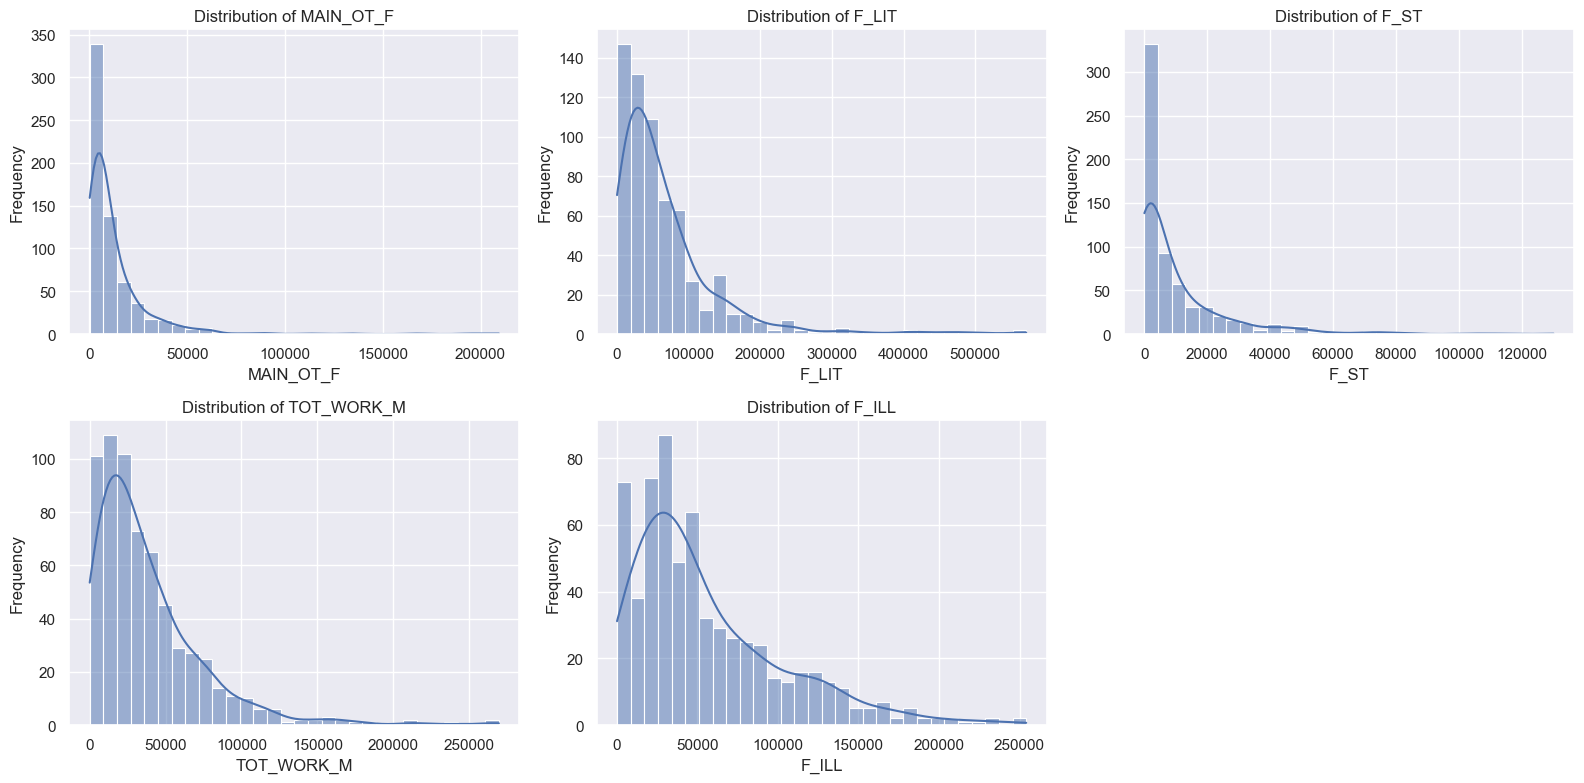

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 8))

# Plot histograms for each variable
sns.histplot(df['MAIN_OT_F'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Distribution of MAIN_OT_F")
axes[0, 0].set_xlabel("MAIN_OT_F")
axes[0, 0].set_ylabel("Frequency")

sns.histplot(df['F_LIT'], bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title("Distribution of F_LIT")
axes[0, 1].set_xlabel("F_LIT")
axes[0, 1].set_ylabel("Frequency")

sns.histplot(df['F_ST'], bins=30, kde=True, ax=axes[0, 2])
axes[0, 2].set_title("Distribution of F_ST")
axes[0, 2].set_xlabel("F_ST")
axes[0, 2].set_ylabel("Frequency")

sns.histplot(df['TOT_WORK_M'], bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title("Distribution of TOT_WORK_M")
axes[1, 0].set_xlabel("TOT_WORK_M")
axes[1, 0].set_ylabel("Frequency")

sns.histplot(df['F_ILL'], bins=30, kde=True, ax=axes[1, 1])
axes[1, 1].set_title("Distribution of F_ILL")
axes[1, 1].set_xlabel("F_ILL")
axes[1, 1].set_ylabel("Frequency")

# Hide the empty subplot
axes[1, 2].axis('off')

# Adjust layout
plt.tight_layout()

# Show the subplots
plt.show()


In [191]:
from scipy import stats

# List of columns for which you want to calculate skewness
columns_to_analyze = ['MAIN_OT_F', 'F_LIT', 'F_ST', 'TOT_WORK_M', 'F_ILL']

# Calculate skewness for each variable
skewness_results = {}
for column in columns_to_analyze:
    skewness = stats.skew(df[column])
    skewness_results[column] = skewness

# Print the skewness values
for column, skewness in skewness_results.items():
    print(f"Skewness for {column}: {skewness:.2f}")


Skewness for MAIN_OT_F: 5.33
Skewness for F_LIT: 3.14
Skewness for F_ST: 2.98
Skewness for TOT_WORK_M: 2.30
Skewness for F_ILL: 1.34


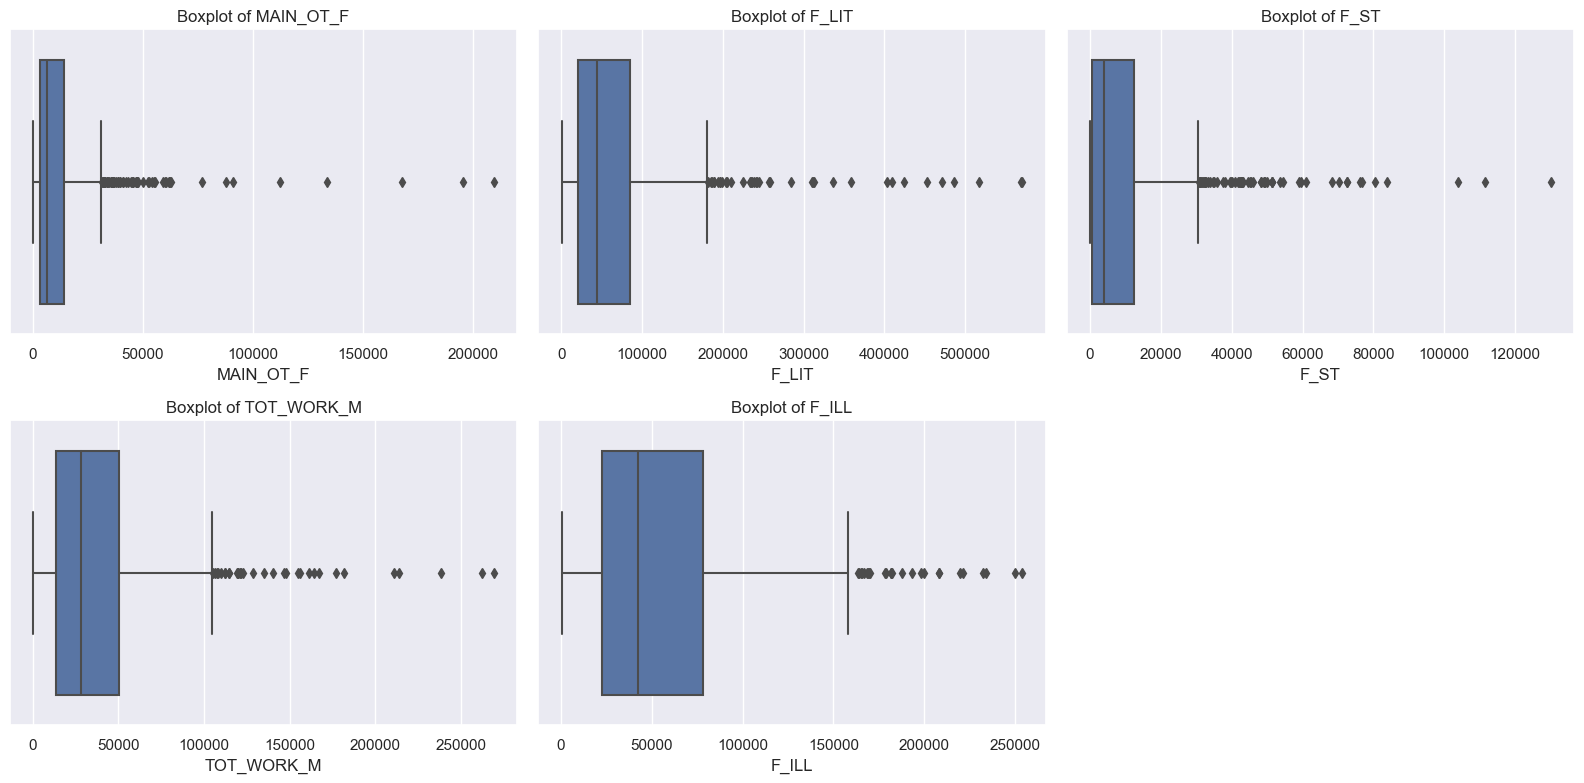

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 8))

# Plot boxplots for each variable
sns.boxplot(x=df['MAIN_OT_F'], ax=axes[0, 0])
axes[0, 0].set_title("Boxplot of MAIN_OT_F")
axes[0, 0].set_xlabel("MAIN_OT_F")

sns.boxplot(x=df['F_LIT'], ax=axes[0, 1])
axes[0, 1].set_title("Boxplot of F_LIT")
axes[0, 1].set_xlabel("F_LIT")

sns.boxplot(x=df['F_ST'], ax=axes[0, 2])
axes[0, 2].set_title("Boxplot of F_ST")
axes[0, 2].set_xlabel("F_ST")

sns.boxplot(x=df['TOT_WORK_M'], ax=axes[1, 0])
axes[1, 0].set_title("Boxplot of TOT_WORK_M")
axes[1, 0].set_xlabel("TOT_WORK_M")

sns.boxplot(x=df['F_ILL'], ax=axes[1, 1])
axes[1, 1].set_title("Boxplot of F_ILL")
axes[1, 1].set_xlabel("F_ILL")

# Hide the empty subplot
axes[1, 2].axis('off')

# Adjust layout
plt.tight_layout()

# Show the subplots
plt.show()


In [109]:
# List of numerical column names
numerical_columns = ["MAIN_OT_F", "F_LIT", "F_ST", "TOT_WORK_M", "F_ILL"]

# Iterate through the numerical columns and count outliers using the IQR method
for column_name in numerical_columns:
    # Calculate the quartiles
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)

    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1

    # Define lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count the number of outliers
    num_outliers = ((df[column_name] < lower_bound) | (df[column_name] > upper_bound)).sum()

    # Print the column name and the count of outliers
    print(f"Number of outliers in '{column_name}': {num_outliers}")


Number of outliers in 'MAIN_OT_F': 59
Number of outliers in 'F_LIT': 37
Number of outliers in 'F_ST': 58
Number of outliers in 'TOT_WORK_M': 32
Number of outliers in 'F_ILL': 26


In [ ]:
Bivarite Analysis

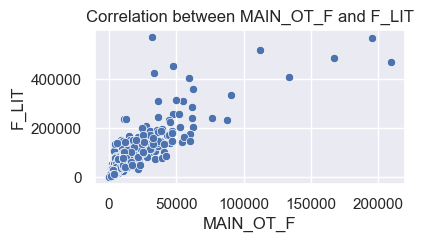

Correlation between MAIN_OT_F and F_LIT: 0.84


In [118]:
#How does the number of Main Female Workers in Occupational Category 'Other than Main Work' (MAIN_OT_F) correlate 
#with the Female Literacy Rate (F_LIT) in female-headed households?

import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatterplot to visualize the correlation
plt.figure(figsize=(4, 2))
sns.scatterplot(data=df, x='MAIN_OT_F', y='F_LIT')
plt.xlabel("MAIN_OT_F")
plt.ylabel("F_LIT")
plt.title("Correlation between MAIN_OT_F and F_LIT")
plt.grid(True)
plt.show()

# Calculate the correlation coefficient
correlation = df['MAIN_OT_F'].corr(df['F_LIT'])
print(f"Correlation between MAIN_OT_F and F_LIT: {correlation:.2f}")


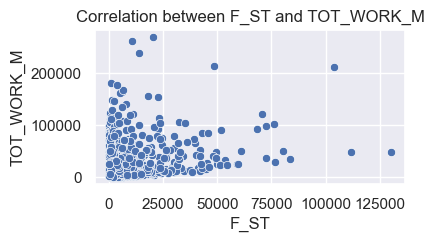

Correlation between F_ST and TOT_WORK_M: 0.12


In [120]:
#Is there a correlation between the number of females belonging to Scheduled Tribes (F_ST)
#and the total male workforce (TOT_WORK_M) in these households?

import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatterplot to visualize the correlation
plt.figure(figsize=(4, 2))
sns.scatterplot(data=df, x='F_ST', y='TOT_WORK_M')
plt.xlabel("F_ST")
plt.ylabel("TOT_WORK_M")
plt.title("Correlation between F_ST and TOT_WORK_M")
plt.grid(True)
plt.show()

# Calculate the correlation coefficient
correlation = df['F_ST'].corr(df['TOT_WORK_M'])
print(f"Correlation between F_ST and TOT_WORK_M: {correlation:.2f}")


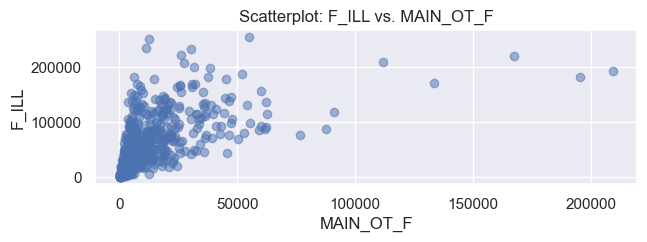

Correlation between F_ILL and MAIN_OT_F: 0.5702348880522302


In [135]:
#Are there any patterns in female iliteracy F_ILL concerning the presence of Main Female Workers in 
#Occupational Category 'Other than Main Work' (MAIN_OT_F) in female-headed households?

# Scatterplot to visualize the relationship
plt.figure(figsize=(7, 2))
plt.scatter(df['MAIN_OT_F'], df['F_ILL'], alpha=0.5)
plt.title("Scatterplot: F_ILL vs. MAIN_OT_F")
plt.xlabel("MAIN_OT_F")
plt.ylabel("F_ILL")
plt.show()

# Calculate the correlation coefficient
corr_f_ill_main_ot_f = df['F_ILL'].corr(df['MAIN_OT_F'])
print(f"Correlation between F_ILL and MAIN_OT_F: {corr_f_ill_main_ot_f}")


Gender Dynamics:

1.Are there any patterns in female literacy (F_LIT) concerning the presence of Main Female Workers in Occupational Category 'Other than Main Work' (MAIN_OT_F) in female-headed households?OR Are there noticeable differences in the Female Literacy Rate (F_LIT) when comparing households with a high number of Main Female Workers in Occupational Category 'Other than Main Work' (MAIN_OT_F) to those with fewer such workers?
2.Do households with a higher number of females from Scheduled Tribes (F_ST) tend to have a different Female Literacy Rate (F_LIT) compared to those with fewer females from Scheduled Tribes?O
3. How does the Female Illiterate Population (F_ILL) vary with the size of the total male workforce (TOT_WORK_M) in these households?


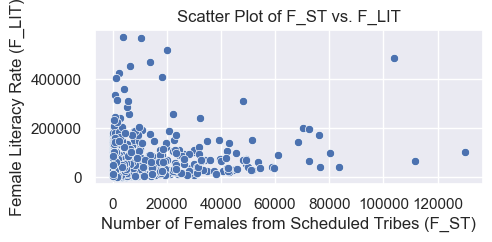

Correlation between F_ST and F_LIT: 0.10089183101776918


In [140]:
#Are there any patterns in female literacy (F_LIT) concerning the presence of Main Female 
#Workers in Occupational Category 'Other than Main Work' (MAIN_OT_F) in female-headed households?


# Create a scatter plot
plt.figure(figsize=(5, 2))
sns.scatterplot(data=df, x='F_ST', y='F_LIT')
plt.title("Scatter Plot of F_ST vs. F_LIT")
plt.xlabel("Number of Females from Scheduled Tribes (F_ST)")
plt.ylabel("Female Literacy Rate (F_LIT)")
plt.show()

# Calculate the correlation coefficient
correlation_coefficient = df['F_ST'].corr(df['F_LIT'])

# Print the correlation coefficient
print(f"Correlation between F_ST and F_LIT: {correlation_coefficient}")


Correlation coefficient between F_ILL and TOT_WORK_M: 0.84


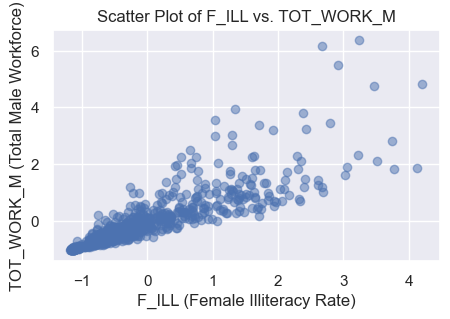

In [196]:
import matplotlib.pyplot as plt
import numpy as np

# Create a scatter plot
plt.figure(figsize=(5, 3))
plt.scatter(df['F_ILL'], df['TOT_WORK_M'], alpha=0.5)
plt.title('Scatter Plot of F_ILL vs. TOT_WORK_M')
plt.xlabel('F_ILL (Female Illiteracy Rate)')
plt.ylabel('TOT_WORK_M (Total Male Workforce)')
plt.grid(True)

# Calculate the correlation coefficient
correlation_coefficient = np.corrcoef(df['F_ILL'], df['TOT_WORK_M'])[0, 1]
print(f"Correlation coefficient between F_ILL and TOT_WORK_M: {correlation_coefficient:.2f}")

# Show the plot
plt.show()




What is the relationship between the Female Illiterate Population (F_ILL) and the presence of Main Female Workers in Occupational Category 'Other than Main Work' (MAIN_OT_F) in these households?
Does the number of females from Scheduled Tribes (F_ST) in these households impact the Female Literacy Rate (F_LIT) significantly, and if so, how?

Multivarite Analysis
"What factors have the most significant impact on the economic well-being and gender dynamics within female-headed households, and how can this knowledge inform targeted policies and interventions?"

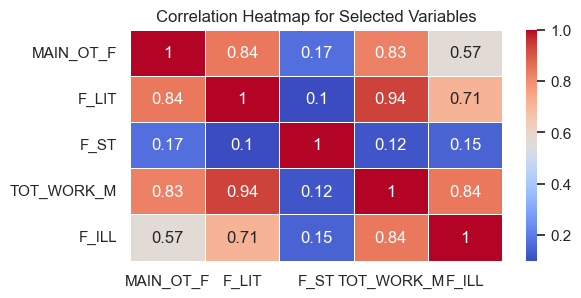

In [197]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the variables of interest
selected_vars = ["MAIN_OT_F", "F_LIT", "F_ST", "TOT_WORK_M", "F_ILL"]

# Calculate the correlation matrix for the selected variables
correlation_matrix = df[selected_vars].corr()

# Create a heatmap
plt.figure(figsize=(6, 3))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Correlation Heatmap for Selected Variables")
plt.show()


In [145]:
# Select the variables of interest
selected_vars = ["MAIN_OT_F", "F_LIT", "F_ST", "TOT_WORK_M", "F_ILL"]

# Calculate correlation coefficients
correlation_matrix = df[selected_vars].corr()

# Display correlation coefficients
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
            MAIN_OT_F     F_LIT      F_ST  TOT_WORK_M     F_ILL
MAIN_OT_F    1.000000  0.844196  0.173849    0.827692  0.570235
F_LIT        0.844196  1.000000  0.100892    0.936739  0.714808
F_ST         0.173849  0.100892  1.000000    0.119171  0.149493
TOT_WORK_M   0.827692  0.936739  0.119171    1.000000  0.844352
F_ILL        0.570235  0.714808  0.149493    0.844352  1.000000
